## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [84]:
# student 1: Dor 5429
# student 2: Avishag 1258
# student 3: Liran 3036
# student 4: Tamer 2213
# student 5: Niv 2219

## Part 2 - Experiments
You could add as many code cells as needed

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [86]:
# Load the train and test datasets
train_file_path = 'wine_train.csv'
test_file_path = 'wine_test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [87]:
# Display the first 5 rows of each dataset
print("Train Data - First 5 Rows: ")
train_df.head()

Train Data - First 5 Rows: 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [88]:
print("\nTest Data - First 5 Rows:")
test_df.head()


Test Data - First 5 Rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [89]:
# EDA: Display summary statistics for the train dataset
print("Train Data - Summary Statistics")
train_df.describe()

Train Data - Summary Statistics


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [90]:
# Display summary statistics for the test dataset
print("\nTest Data - Summary Statistics")
test_df.describe()


Test Data - Summary Statistics


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


In [91]:
pd.crosstab(train_df['alcalinity_of_ash'], train_df['target'])

target,0,1,2
alcalinity_of_ash,,,
10.6,0,1,0
11.2,1,0,0
11.4,1,0,0
12.0,1,0,0
12.4,1,0,0
13.2,1,0,0
14.0,1,0,0
14.6,1,0,0
15.0,1,1,0


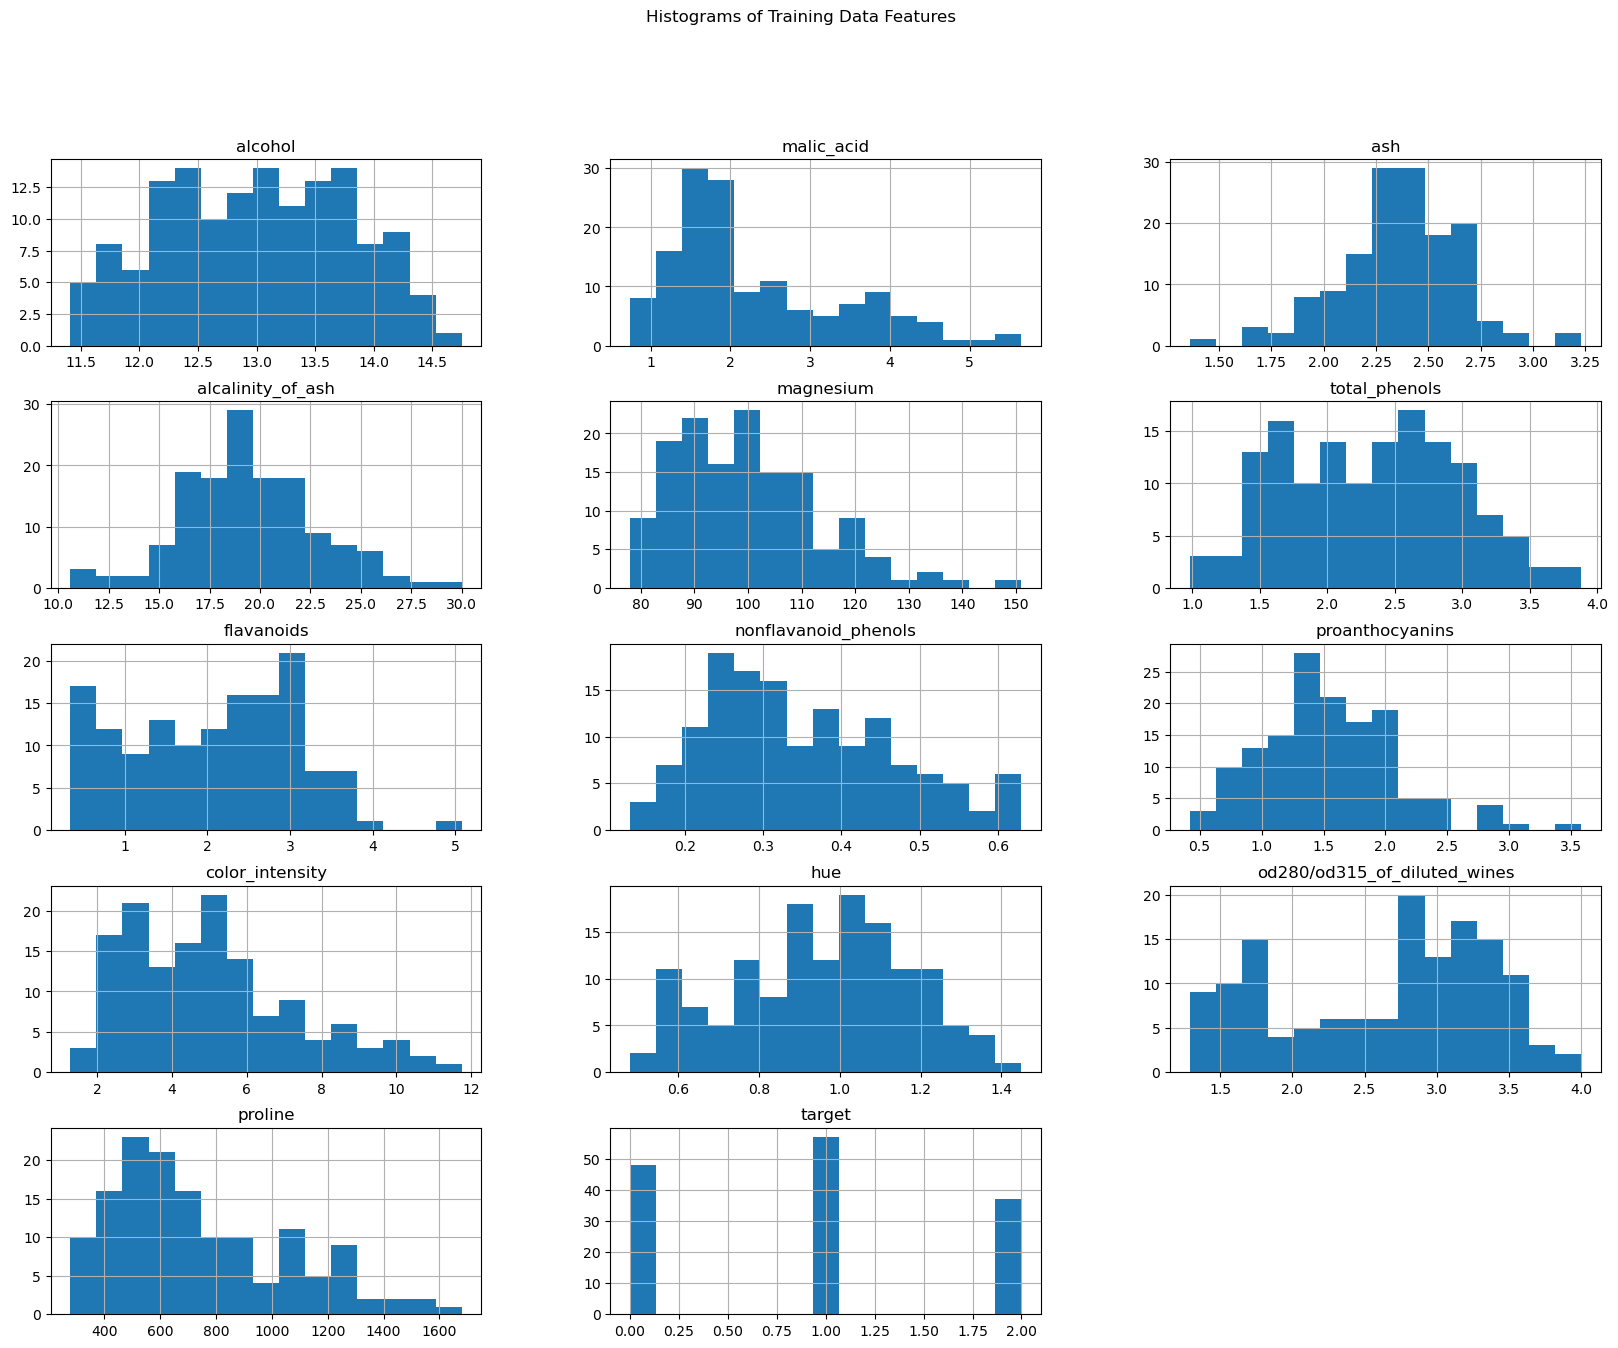

In [92]:
train_df.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of Training Data Features')
plt.show()

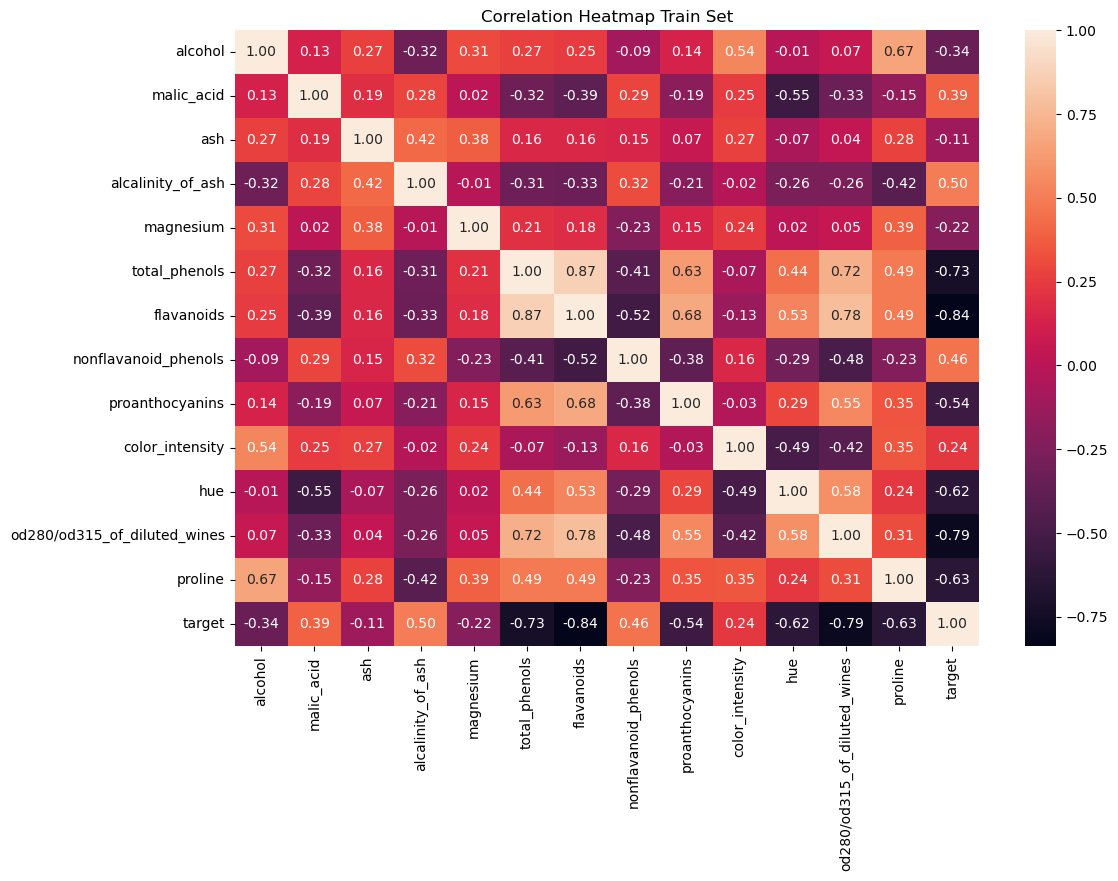

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap Train Set')
plt.show()

In [94]:
# feature engineering

In [95]:
# Separate features and target variable
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_test = test_df.drop(columns=['target'])
y_test = test_df['target']


In [96]:
# Apply both StandardScaler and MinMaxScaler to the features
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))

# Standard Scaling
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)

# Min-Max Scaling
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

In [97]:
#training

In [98]:
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

In [99]:
# Define the parameter grids for KNN and Decision Tree
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

In [100]:
#grid search

In [101]:
# Function to perform GridSearchCV and return the best parameters and score:
def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_

# Perform GridSearchCV for KNN and Decision Tree on original, standard scaled, and min-max scaled data:

# Original Data
best_knn_params_original, best_knn_score_original = perform_grid_search(KNeighborsClassifier(), knn_param_grid, X_train, y_train)
best_dt_params_original, best_dt_score_original = perform_grid_search(DecisionTreeClassifier(), dt_param_grid, X_train, y_train)

# Standard Scaled Data
best_knn_params_standard, best_knn_score_standard = perform_grid_search(KNeighborsClassifier(), knn_param_grid, X_train_standard_scaled, y_train)
best_dt_params_standard, best_dt_score_standard = perform_grid_search(DecisionTreeClassifier(), dt_param_grid, X_train_standard_scaled, y_train)

# Min-Max Scaled Data
best_knn_params_minmax, best_knn_score_minmax = perform_grid_search(KNeighborsClassifier(), knn_param_grid, X_train_minmax_scaled, y_train)
best_dt_params_minmax, best_dt_score_minmax = perform_grid_search(DecisionTreeClassifier(), dt_param_grid, X_train_minmax_scaled, y_train)



In [102]:
# Create and display the summary table
summary_table = pd.DataFrame({
    'Model': ['KNN (Original)', 'Decision Tree (Original)', 'KNN (Standard Scaled)', 'Decision Tree (Standard Scaled)', 'KNN (Min-Max Scaled)', 'Decision Tree (Min-Max Scaled)'],
    'Best Parameters': [best_knn_params_original, best_dt_params_original, best_knn_params_standard, best_dt_params_standard, best_knn_params_minmax, best_dt_params_minmax],
    'Best F1 Macro Score': [best_knn_score_original, best_dt_score_original, best_knn_score_standard, best_dt_score_standard, best_knn_score_minmax, best_dt_score_minmax]
})

summary_table


,Model,Best Parameters,Best F1 Macro Score
0,KNN (Original),"{'metric': 'manhattan', 'n_neighbors': 11}",0.730145
1,Decision Tree (Original),"{'max_depth': 10, 'min_samples_split': 2}",0.898918
2,KNN (Standard Scaled),"{'metric': 'manhattan', 'n_neighbors': 9}",0.978968
3,Decision Tree (Standard Scaled),"{'max_depth': 20, 'min_samples_split': 20}",0.892399
4,KNN (Min-Max Scaled),"{'metric': 'euclidean', 'n_neighbors': 11}",0.972619
5,Decision Tree (Min-Max Scaled),"{'max_depth': None, 'min_samples_split': 2}",0.899813


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [103]:
# Identify the best model and train the entire training dataset

In [104]:
best_index = summary_table['Best F1 Macro Score'].idxmax()
best_model_info = summary_table.loc[best_index]

best_model_name = best_model_info['Model']
best_params = best_model_info['Best Parameters']
best_f1_score = best_model_info['Best F1 Macro Score']

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Best F1 Macro Score: {best_f1_score}")

# Determine the best feature scaling method based on the model name
if 'Standard Scaled' in best_model_name:
    X_train_final = X_train_standard_scaled
    X_test_final = X_test_standard_scaled
else:
    X_train_final = X_train_minmax_scaled
    X_test_final = X_test_minmax_scaled

# Initialize the best model with the best parameters
if 'KNN' in best_model_name:
    best_model = KNeighborsClassifier(**best_params)
else:
    best_model = DecisionTreeClassifier(**best_params)

Best Model: KNN (Standard Scaled)
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best F1 Macro Score: 0.9789682539682539


In [105]:
# Train the best model on the entire training dataset
best_model.fit(X_train_final, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

## Part 4 - Apply on test and show model performance estimation

In [106]:
# Evaluate the model on the test dataset
y_pred = best_model.predict(X_test_final)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Classification Report for Best Model:")
print(report)
print(f"Macro F1 Score for Best Model: {f1}")

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Macro F1 Score for Best Model: 0.9731615673644659


In [107]:
# Show performance estimation for the first few predictions
predictions_df = pd.DataFrame({
    'Actual': y_test[:20],
    'Predicted': y_pred[:20]
})

print("Performance Estimation for the First Few Predictions:")
predictions_df

Performance Estimation for the First Few Predictions:


,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1
